# Undersampling e Oversampling

Desbalanceamento de dados é um problema muito comum nos conjuntos de dados. Duas possíveis soluções são a subamostragem (undersampling) aleatória e a superamostragem (oversampling) aleatória. O exemplo a seguir mostra um exemplo simples de como isso pode ser feito utilizando a biblioteca Pandas.

---

## Exploração inicial dos dados:

Criando conjunto de dados artificial, desbalanceado:

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

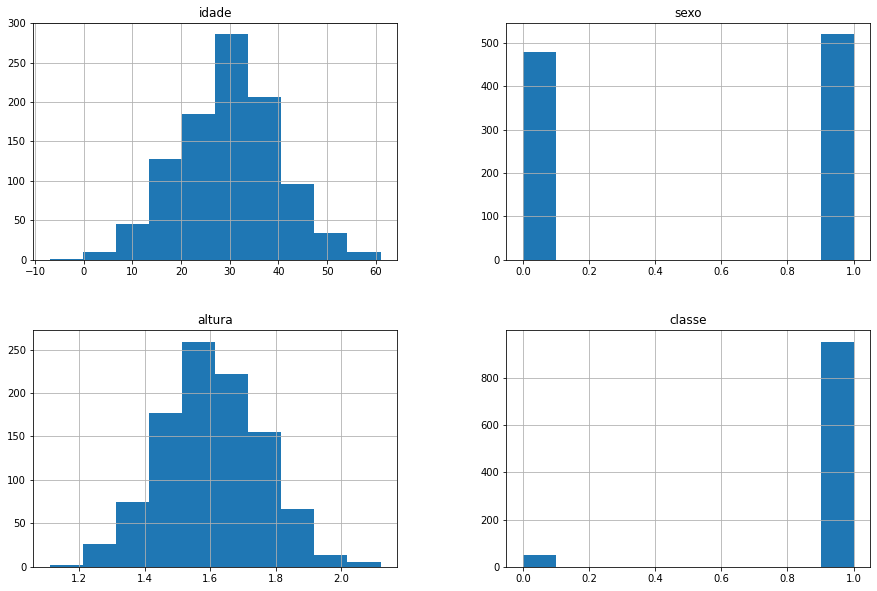

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Dados de exemplo
dados = pd.DataFrame({
    'idade': np.round(np.random.normal(loc=30, scale=10, size=1000)),
    'sexo': np.random.choice([0, 1], 1000), # 0 homem, 1 mulher
    'altura': np.round(np.random.normal(loc=1.6, scale=.15, size=1000), 2),
    'classe':  np.random.choice([0, 1], 1000, p=[0.05, 0.95])
    })

plt.rcParams['figure.figsize'] = [15, 10]
dados.hist()

Nota-se um grande desbalanceamento das classes através do histograma da variável alvo `classe`

In [2]:
dados['classe'].value_counts()

1    952
0     48
Name: classe, dtype: int64

A função `value_counts()` confirma o desbalanceamento: há **955** ocorrências da classe 1 e apenas **45** da classe 0.

---

## Superamostragem - Oversampling

Na superamostragem vamos aumentar o número de elementos da classe menos representada.

Primeiro vamos separar as tuplas do nosso conjunto de dados em que a classe é igual à 0:

In [3]:
classe_0 = dados[dados.classe == 0]
classe_0

,idade,sexo,altura,classe
32,20.0,0,1.53,0
36,25.0,0,1.52,0
61,36.0,1,1.77,0
64,9.0,1,1.86,0
94,22.0,0,1.82,0
95,44.0,1,1.58,0
100,53.0,0,1.50,0
149,54.0,0,1.63,0
177,34.0,0,1.54,0
186,33.0,1,1.48,0


In [4]:
classe_0.shape

(48, 4)

Agora vamos obter uma amostra de tamanho **955**, para que as classes fiquem igualmente distribuídas. Note que `replace` deve ser true, pois sem repetições não conseguiriamos criar uma amostra da classe `0` maior que **45**:

In [5]:
sample_0 = classe_0.sample(n=955, replace=True)
sample_0

,idade,sexo,altura,classe
95,44.0,1,1.58,0
200,13.0,0,1.48,0
884,33.0,0,1.67,0
100,53.0,0,1.50,0
851,22.0,1,1.58,0
...,...,...,...,...
985,37.0,1,1.36,0
601,26.0,1,1.45,0
644,19.0,0,1.62,0
510,40.0,1,1.60,0


Agora vamos concatenar os dados da nossa amostra com os dados do conjunto original que possuiam classe igual à 1:

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

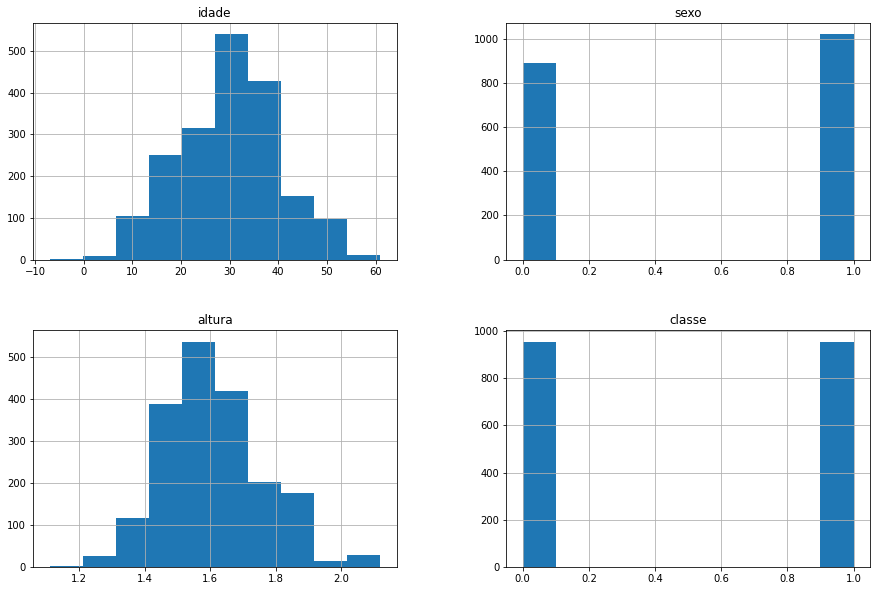

In [6]:
classe_1 = dados[dados.classe == 1]
dados_upsampled = pd.concat([sample_0, classe_1])
dados_upsampled.hist()

Checando a distribuição das classes:

array([[<AxesSubplot:title={'center':'classe'}>]], dtype=object)

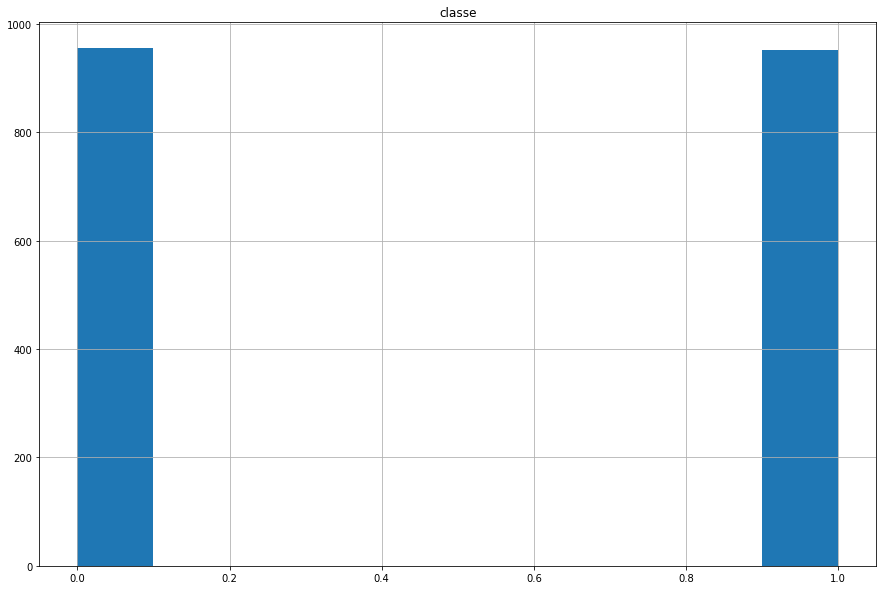

In [7]:
dados_upsampled.hist('classe')

In [8]:
dados_upsampled['classe'].value_counts()

0    955
1    952
Name: classe, dtype: int64

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

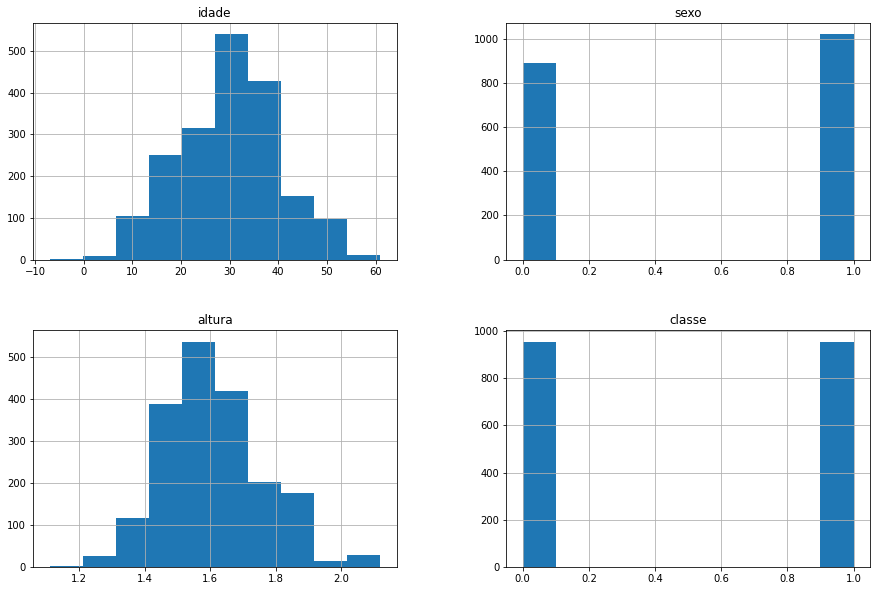

In [9]:
dados_upsampled.hist()



---

## Subamostragem - Undersampling

Para a subamostragem, vamos diminuir o tamanho da classe predominante.

Checando a distribuição das classes nos dados originais:

In [10]:
dados['classe'].value_counts()

1    952
0     48
Name: classe, dtype: int64

Selecionando as tuplas em que a classe é igual à 1:

In [11]:
classe_1 = dados[dados.classe == 1]
classe_1

,idade,sexo,altura,classe
0,39.0,0,1.46,1
1,32.0,1,1.19,1
2,18.0,0,1.69,1
3,16.0,1,1.60,1
4,51.0,1,1.22,1
...,...,...,...,...
995,29.0,0,1.61,1
996,19.0,1,1.59,1
997,38.0,0,1.40,1
998,20.0,0,1.34,1


Obtendo uma amostra de tamanho **45**. Note que, nesse caso, é interessante que nossa amostra possua elementos distintos, por isso `replace=False`:

In [12]:
sample_1 = classe_1.sample(n=45, replace=False)
sample_1

,idade,sexo,altura,classe
70,53.0,0,1.49,1
230,40.0,0,1.57,1
939,34.0,0,1.79,1
687,42.0,1,1.86,1
14,33.0,1,1.49,1
810,32.0,0,1.59,1
328,30.0,0,1.59,1
45,33.0,1,1.72,1
914,51.0,0,1.64,1
269,40.0,0,1.76,1


In [13]:
sample_1.shape

(45, 4)

Agora iremos concatenar a amostra com dados com os dados do conjunto original que possuiam classe igual a `0`:

In [14]:
classe_0 = dados[dados.classe == 0]
dados_downsampled = pd.concat([classe_0, sample_1])

Verificando a distribuição das classes:

array([[<AxesSubplot:title={'center':'classe'}>]], dtype=object)

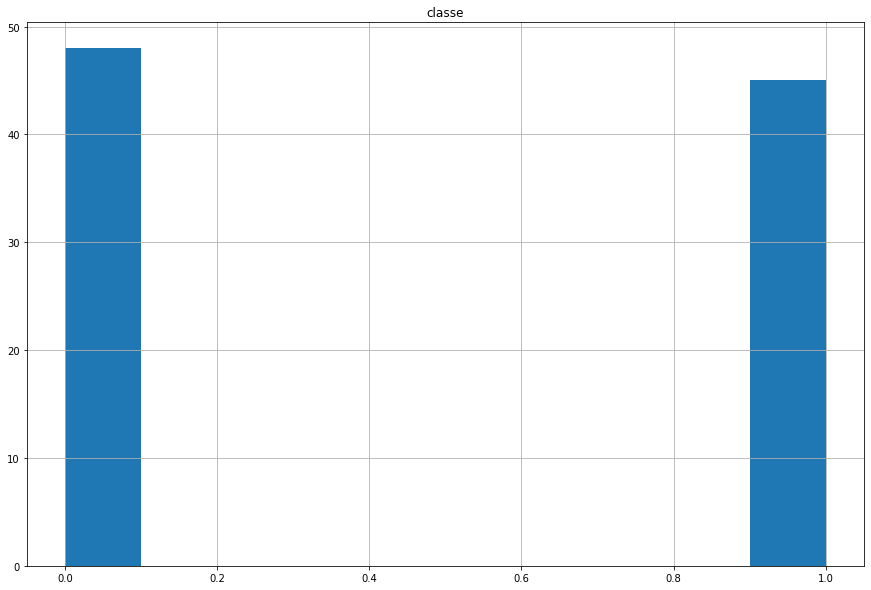

In [15]:
dados_downsampled.hist('classe')

In [16]:
dados_downsampled['classe'].value_counts()

0    48
1    45
Name: classe, dtype: int64

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

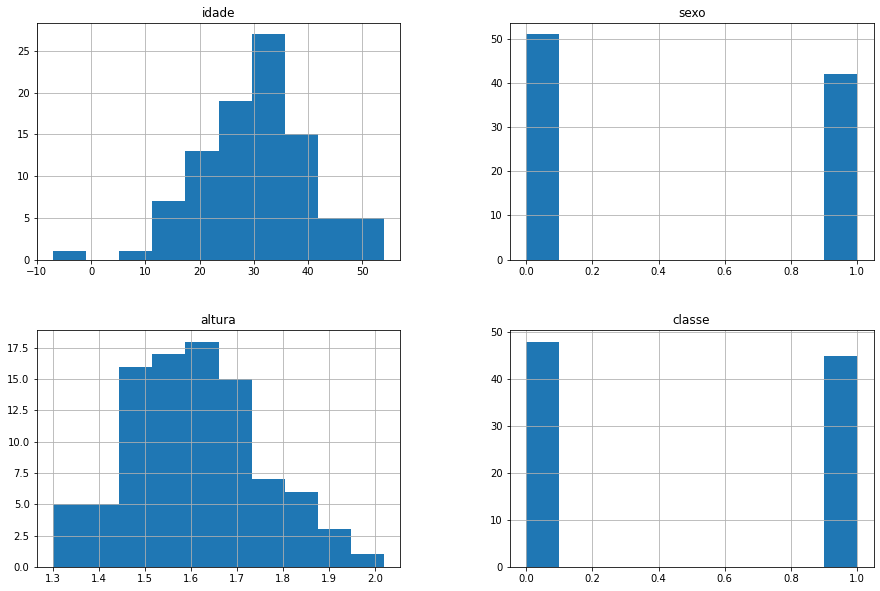

In [17]:
dados_downsampled.hist()

### Fazendo sampling dos exemplos e da classe quando estão em objetos diferentes

In [18]:
indices_0 = np.where(dados.classe == 0)[0]
atributos = dados[['altura','sexo', 'idade']].to_numpy()
classes = dados['classe'].to_numpy()

indices_0_sample = np.random.choice(indices_0, size=10, replace=False)



---

## Métricas de desempenho em conjuntos desbalanceados

Alguns cuidados são necessários ao medir desempenho em dados não balanceados. Por exemplo, suponha um classificador binário (`Some_classifier`) que sempre classifica uma entrada como a classe predominante do conjunto. Vamos calcular sua acurácia no conjunto de dados inicial:

In [21]:
import numpy as np

# Criando uma classe de classificador de exemplo
class Some_classifier:
    def __init__(self):
        self.predict_value = None
    def fit(self, X, y):
        self.predict_value = y.mode()
    def predict(self, X):
        return np.repeat(1, X.shape[0])

Separando em variáveis de entrada (`X`) e variáveis alvo (`y`) e calculando acurácia padrão:

In [20]:
from sklearn.metrics import accuracy_score

# Separando o conjunto de dados
X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

my_classifier = Some_classifier()
my_classifier.fit(X, y)
y_pred = my_classifier.predict(X)

print("Acurácia do classificador: %.2f%%" % (accuracy_score(y, y_pred)*100))

Acurácia do classificador: 95.20%


A medida de acurácia não representa muito bem o desempenho do nosso classificador.

Material que discute bem diferentes métricas para dados desbalanceados: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

### Importante: Técnicas de amostragem devem ser feitas no conjunto de treinamento!